<a href="https://colab.research.google.com/github/Makito042/alu-pca-ml/blob/master/Template_PCA_Formative_1%5BPeer_Pair_Number%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

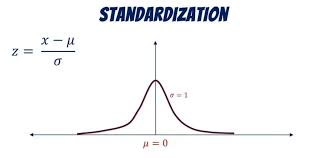


In [4]:
import numpy as np
import pandas as pd

df = pd.read_csv("african_crises.csv")

features = ['systemic_crisis', 'exch_usd', 'domestic_debt_in_default',
            'sovereign_external_debt_default', 'gdp_weighted_default',
            'inflation_annual_cpi', 'independence', 'currency_crises',
            'inflation_crises']
data = df[features].dropna()

mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
standardized_data = (data - mean) / std
standardized_data = standardized_data.to_numpy()

standardized_data[:5] 

array([[ 3.45175812, -0.38671252, -0.20321893, -0.42497295, -0.14700624,
        -0.03086348, -1.86235185, -0.37805817, -0.38547376],
       [-0.28970744, -0.38670773, -0.20321893, -0.42497295, -0.14700624,
        -0.03084763, -1.86235185, -0.37805817, -0.38547376],
       [-0.28970744, -0.38671243, -0.20321893, -0.42497295, -0.14700624,
        -0.03087408, -1.86235185, -0.37805817, -0.38547376],
       [-0.28970744, -0.38671776, -0.20321893, -0.42497295, -0.14700624,
        -0.03085199, -1.86235185, -0.37805817, -0.38547376],
       [-0.28970744, -0.3867211 , -0.20321893, -0.42497295, -0.14700624,
        -0.03087427, -1.86235185, -0.37805817, -0.38547376]])

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [5]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False)  # Calculate covariance matrix
cov_matrix

array([[ 1.00094518,  0.20287813,  0.12227396,  0.25008637,  0.00527918,
         0.10655226,  0.14722222,  0.11285756,  0.17272494],
       [ 0.20287813,  1.00094518,  0.005258  ,  0.42328974, -0.04076417,
        -0.01195788,  0.12615328, -0.0565252 , -0.06384318],
       [ 0.12227396,  0.005258  ,  1.00094518,  0.46519012, -0.02990269,
         0.15197534,  0.10922265,  0.22780017,  0.22464067],
       [ 0.25008637,  0.42328974,  0.46519012,  1.00094518,  0.34624602,
         0.07267715,  0.22840723,  0.19961649,  0.18810757],
       [ 0.00527918, -0.04076417, -0.02990269,  0.34624602,  1.00094518,
        -0.00453969,  0.07901041,  0.01698597,  0.0176471 ],
       [ 0.10655226, -0.01195788,  0.15197534,  0.07267715, -0.00453969,
         1.00094518,  0.01658431,  0.07666228,  0.08013589],
       [ 0.14722222,  0.12615328,  0.10922265,  0.22840723,  0.07901041,
         0.01658431,  1.00094518,  0.08645776, -0.02256886],
       [ 0.11285756, -0.0565252 ,  0.22780017,  0.19961649,  0

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [6]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Perform eigendecomposition
eigenvalues, eigenvectors

(array([2.16909221, 0.25557769, 1.40923447, 0.57594354, 0.72280643,
        1.10128273, 0.97613311, 0.89055298, 0.90788346]),
 array([[ 0.33393328,  0.03148579, -0.10556128, -0.237249  , -0.55382196,
         -0.38263327, -0.10537359,  0.59522144, -0.03934211],
        [ 0.24411692,  0.41530906, -0.54037425,  0.07191927,  0.46135962,
         -0.34351581, -0.18438316, -0.02886561,  0.32413333],
        [ 0.42584938,  0.42035148,  0.17918805, -0.0567975 , -0.41429919,
         -0.04043595,  0.20165064, -0.62395206,  0.05800508],
        [ 0.55078656, -0.71398662, -0.2723317 , -0.00759462,  0.01405845,
          0.18071867,  0.03020693, -0.17335566,  0.22093779],
        [ 0.17147824,  0.36450289, -0.20661982, -0.03830525, -0.03666044,
          0.79366171,  0.18119368,  0.34705744,  0.09513629],
        [ 0.16554693, -0.02327177,  0.17806069,  0.04903532,  0.30711725,
         -0.25589905,  0.8513481 ,  0.23062914, -0.01240344],
        [ 0.24874786,  0.03782228, -0.27384402,  0.2458886

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [7]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Sort eigenvectors accordingly
sorted_eigenvectors

array([[ 0.33393328, -0.10556128, -0.38263327, -0.10537359, -0.03934211,
         0.59522144, -0.55382196, -0.237249  ,  0.03148579],
       [ 0.24411692, -0.54037425, -0.34351581, -0.18438316,  0.32413333,
        -0.02886561,  0.46135962,  0.07191927,  0.41530906],
       [ 0.42584938,  0.17918805, -0.04043595,  0.20165064,  0.05800508,
        -0.62395206, -0.41429919, -0.0567975 ,  0.42035148],
       [ 0.55078656, -0.2723317 ,  0.18071867,  0.03020693,  0.22093779,
        -0.17335566,  0.01405845, -0.00759462, -0.71398662],
       [ 0.17147824, -0.20661982,  0.79366171,  0.18119368,  0.09513629,
         0.34705744, -0.03666044, -0.03830525,  0.36450289],
       [ 0.16554693,  0.17806069, -0.25589905,  0.8513481 , -0.01240344,
         0.23062914,  0.30711725,  0.04903532, -0.02327177],
       [ 0.24874786, -0.27384402,  0.01361127, -0.03019326, -0.88757382,
        -0.06074566,  0.09310192,  0.24588869,  0.03782228],
       [ 0.34083443,  0.45025055,  0.07205959, -0.27877268, -0

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [ ]:
# Step 6: Project Data onto Principal Components
num_components = None  # Decide on the number of principal components to keep
reduced_data = None  # Project data onto the principal components
reduced_data[:5]

array([[-0.01224114,  0.10033019],
       [-1.26163722,  0.4952843 ],
       [-1.26164275,  0.49528213],
       [-1.26164039,  0.49528895],
       [-1.2616449 ,  0.49528678]])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [ ]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (1059, 2)


array([[-0.01224114,  0.10033019],
       [-1.26163722,  0.4952843 ],
       [-1.26164275,  0.49528213],
       [-1.26164039,  0.49528895],
       [-1.2616449 ,  0.49528678]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

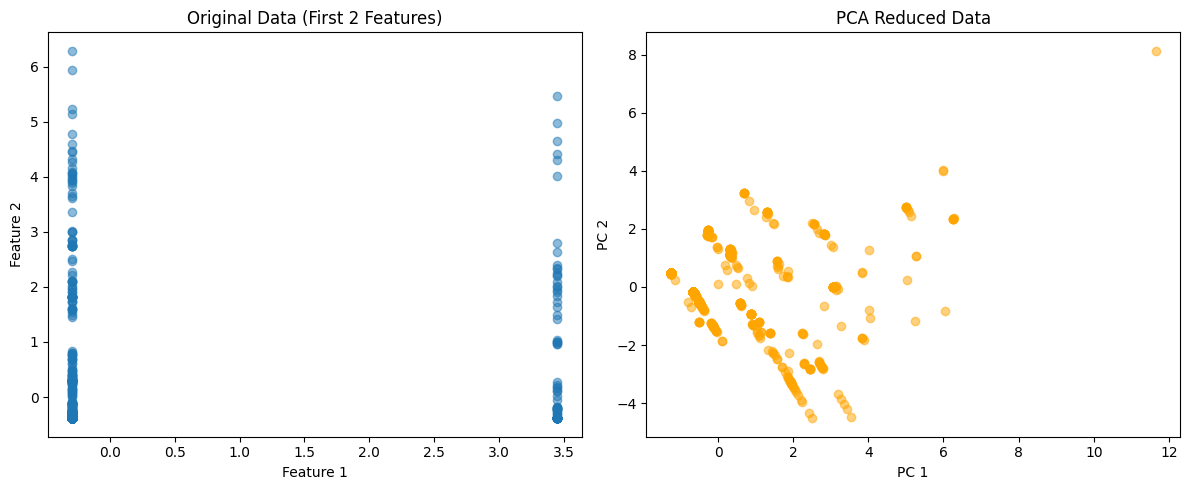

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.5)
plt.title('Original Data (First 2 Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5, color='orange')
plt.title('PCA Reduced Data')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.tight_layout()
plt.show()